# **PREDIÇÃO DE AVC**

O objetivo deste trabalho é fazer uma análise estatística do Behavioral Risk Factor Surveillance System 2015 (BRFSS2015) na ocorrência de acidente vascular cerebral (AVC), pesquisa feita pelo Centro de Prevenção e Controle de Doenças (CDC) dos Estados Unidos.

Link do dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset

## Bibliotecas Utilizadas 

* [pandas](https://https://pandas.pydata.org)
* [matplotlib](https://matplotlib.org)
* [seaborn](https://seaborn.pydata.org)

## Dependências

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io

In [81]:
from google.colab import files
uploaded = files.upload()

Saving stroke_data.csv to stroke_data (1).csv


## Pré-análise do Dataset

In [82]:
df = pd.read_csv(io.BytesIO(uploaded['stroke_data.csv']))
df.isnull().any()

sex                   True
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [83]:
df.dtypes

sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## Análise do Dataset

In [84]:
df.describe() #fornece uma visão geral do dataset

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [85]:
df.corr() #verifica a correlação entre os tipos de dados

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.115259,-0.039178,-0.045350,-0.025981,0.003121,0.003715,-0.039357,-0.006016,-0.027994,-0.111036
age,-0.115259,1.000000,0.014365,0.024541,0.006294,0.003647,0.002686,0.027271,-0.012323,-0.002070,0.058534
hypertension,-0.039178,0.014365,1.000000,0.079968,0.033760,-0.033133,-0.002651,0.203502,0.082386,-0.017813,0.257182
heart_disease,-0.045350,0.024541,0.079968,1.000000,0.071596,0.049382,0.013000,0.252034,0.021374,0.137279,0.223930
ever_married,-0.025981,0.006294,0.033760,0.071596,1.000000,0.051596,-0.057161,0.160268,0.113667,0.137516,0.181656
work_type,0.003121,0.003647,-0.033133,0.049382,0.051596,1.000000,-0.011294,0.018167,0.074723,0.052938,0.026494
Residence_type,0.003715,0.002686,-0.002651,0.013000,-0.057161,-0.011294,1.000000,0.016431,0.037169,0.017704,0.011682
avg_glucose_level,-0.039357,0.027271,0.203502,0.252034,0.160268,0.018167,0.016431,1.000000,0.242823,0.056832,0.265452
bmi,-0.006016,-0.012323,0.082386,0.021374,0.113667,0.074723,0.037169,0.242823,1.000000,0.042448,0.018326
smoking_status,-0.027994,-0.002070,-0.017813,0.137279,0.137516,0.052938,0.017704,0.056832,0.042448,1.000000,0.068368


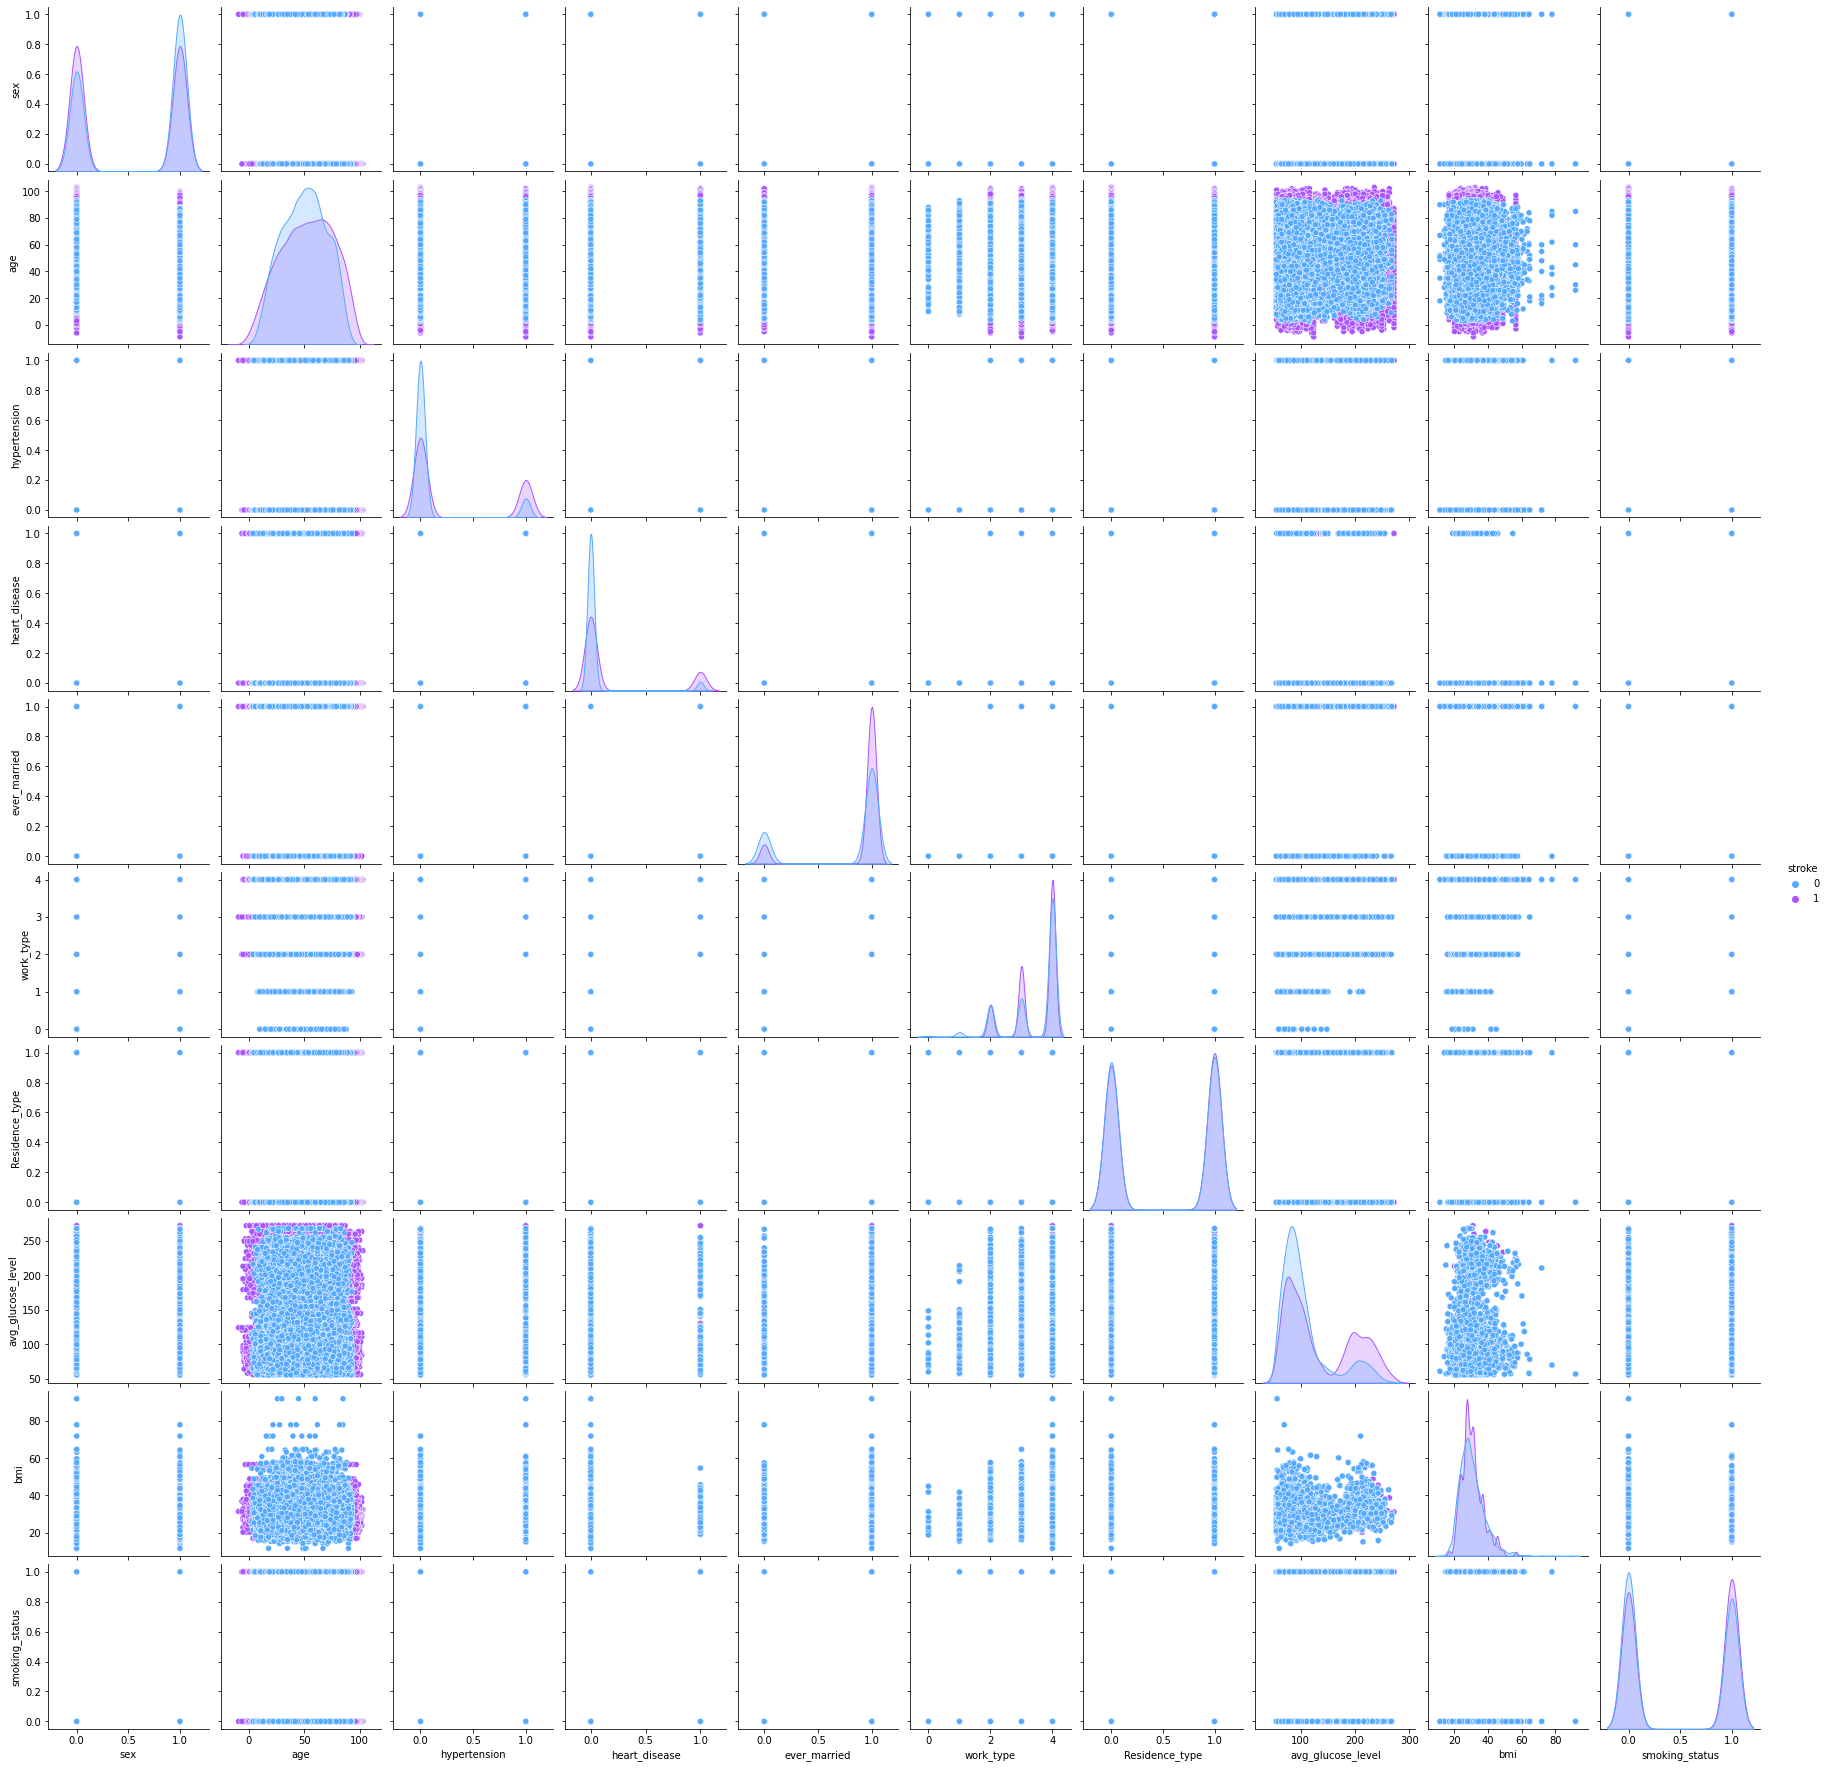

In [88]:
sns.pairplot(df, hue='stroke', palette='cool') #exibe um gráfico de dispersão com foco na ocorrência ou não de AVC